In [1]:
import random 
import numpy as np 
import matplotlib as mpl
import matplotlib.pyplot as plt 
import matplotlib.figure
import matplotlib.lines as mlines
import seaborn as sns
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering, SpectralClustering
from sklearn.datasets import make_blobs 
from scipy.spatial import distance_matrix, distance
from scipy.cluster import hierarchy 
import glob
import pandas as pd
from sklearn.preprocessing import StandardScaler 
import warnings
warnings.filterwarnings("ignore")
%matplotlib inline

In [2]:
def getData(fileText):
    #Get the data text sorted out
    column1 = []
    column2 = []
    for row in fileText.splitlines():
        if(row[7]!=" "):
            column1.append(row[7:15])
            column2.append(row[57:72])
    column1 = column1[10:280]
    column2 = column2[10:280]
    #Convert to numerical data     
    column1_num = pd.to_numeric(column1)
    column2_num = pd.to_numeric(column2)
    slopes = np.diff(column2_num, axis=0)/np.diff(column1_num, axis=0)
    
    return slopes

In [3]:
class Cluster:
    def __init__(self, X):
        self.X = X
        
    def k_means_cluster(self):
        mpl.style.use('default')
        np.random.seed(0)
        X = self.X
        #Preprocess data
        X = StandardScaler().fit_transform(X)
        #Initialize clustering, fit the data
        k_means = KMeans(init = "k-means++", n_clusters = 4, n_init = 12)
        k_means.fit(X)
        #Get labels (clusters)
        labels = k_means.labels_
        cluster_centers = k_means.cluster_centers_
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
        ax = fig.add_subplot(1, 1, 1)
        #Produce scatter
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='blue', s=200, alpha=0.5);
        plt.title('K-Means')
        plt.show()

        return labels
    
    def agglom_cluster(self):
        X = self.X
        mpl.style.use('default')
        #Initialize clustering, fit the data
        agglom = AgglomerativeClustering(n_clusters = 4, linkage = 'average')
        agglom.fit(X)
        #Get labels (clusters)
        labels = agglom.labels_
        #Figure of size 6by 4 inches.
        plt.figure(figsize=(6,4))
        #Create a minimum and maximum range
        x_min, x_max = np.min(X, axis=0), np.max(X, axis=0)
        #Get the average distance
        X = (X - x_min) / (x_max - x_min)
        dist_matrix = distance.pdist(X, metric="jaccard")
        #Use distance to produce dendrogram
        Z = hierarchy.linkage(dist_matrix, 'average')
        dendro = hierarchy.dendrogram(Z)
        plt.title('Agglom')
        plt.show()
        #Produce scatter
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title('Agglom')
        plt.show()
        return labels
    
    def spectral_cluster(self):
        X = self.X
        mpl.style.use('default')
        #Preprocess data
        X = StandardScaler().fit_transform(X)
        #Initialize clustering, fit the data
        clustering = SpectralClustering(n_clusters=4, assign_labels="discretize", random_state=0)
        clustering.fit(X)
        #Get labels (clusters)
        labels =  clustering.labels_
        #Figure 6 by 4 inches
        fig = plt.figure(figsize=(6, 4))
        colors = plt.cm.Spectral(np.linspace(0, 1, len(set(labels))))
        ax = fig.add_subplot(1, 1, 1)
        #Produce scatter
        plt.scatter(X[:, 0], X[:, 1], c=labels, s=50)
        plt.title('Spectral')
        plt.show()
        
        return labels
    
    def graph(self, cluster_array):
        mpl.style.use('ggplot')
        #cluster_array = np.array([3, 3, 3, 1, 1, 3, 0, 3, 1, 0, 2, 0, 3, 3])
        arrays = []
        filearrs = []
        for i in range(np.max(cluster_array)+1):
            arrays.append([])
            filearrs.append([])
        index = 0
        path = "/Users/johnrussell/Desktop/Ti-Dataset-Fixed/*.nor"
        for file in glob.glob(path):
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[57:72])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            cluster_arr_index = cluster_array[index]
            #print(cluster_arr_index)
            arrays[cluster_arr_index].append(columns_df)
            filearrs[cluster_arr_index].append(file[file.index('Fixed/Ti')+6:file.index('.nor')])
            index = index + 1

        figs = []
        fig = plt.figure()
        subplots = []
        #print(len(arrays[3]))
        for i in range(len(arrays)):
            figs.append(plt.figure())
            #subplots.append(fig.add_subplot(2, 2, i+1))
        for i in range(len(arrays)):
            ax = figs[i].add_subplot()
            #print(filearrs[i])
            for figure in arrays[i]:
                mpl.style.use('ggplot')
                #print(figure.index)
                figure.plot(x='X', y='Y', kind='line', figsize=(20,10), ax=ax)
            ax.set_xlabel('Energy   (eV)')
            ax.set_ylabel('normalized xµ(E)')
            #ax.set_title('X and Y')
            ax.legend(filearrs[i])

In [5]:
class Graph:
    def __init__(self, minX=6400, maxX=6800, minY=0, maxY=2):
        self.minX = minX
        self.maxX = maxX
        self.maxY = maxY
        self.minY = minY
    def each_graph(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/Ti-Dataset-Fixed/*.nor"
        files = []
        for file in glob.glob(path):
            #print(file[file.index('XAFS'):]+"\n")
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            files.append(file[file.index('XAFS')+10:file.index('.nor')])
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:38])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)
            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10), xlim=(self.minX, self.maxX),ylim=(self.minY,self.maxY))
            plt.legend(files)
            del files[0]
    def all_graphs(self):
        mpl.style.use('ggplot')
        path = "/Users/johnrussell/Desktop/Ti-Dataset-Fixed/*.nor"
        fig = plt.figure()
        files = []
        for file in glob.glob(path):
            ax = fig.add_subplot()
            fileCSV = pd.read_csv(file, skiprows=37)
            fileText = fileCSV.to_string()
            files.append(file[file.index('XAFS')+10:file.index('.nor')])
            column1 = []
            column2 = []
            for row in fileText.splitlines():
                if(row[7]!=" "):
                    column1.append(row[7:15])
                    column2.append(row[23:38])
            #Convert to numerical data     
            column1_num = pd.to_numeric(column1)
            column2_num = pd.to_numeric(column2)

            columns_df = pd.DataFrame(data=np.array([column1_num, column2_num])).transpose()
            columns_df.columns = ['X','Y']
            plt.set_xlabel('Energy   (eV)')
            plt.set_ylabel('normalized xµ(E)')
            mpl.style.use('ggplot')
            columns_df.plot(x='X', y='Y', kind='line', figsize=(20,10), ax=ax, xlim=(self.minX, self.maxX),ylim=(0,self.maxY))
            plt.legend(files)
    

In [9]:
xdata = np.zeros((20, 269), dtype=float)

In [10]:
path = "/Users/johnrussell/Desktop/Ti-Dataset-Fixed/*.nor"
#datapoints = []
num = 0
#Get data from all the files
for file in glob.glob(path):
    #print(num, file[file.index('XAFS'):]+"\n")
    num = num + 1
    fileCSV = pd.read_csv(file, skiprows=37)
    #print(fileCSV.head())
    fileString = fileCSV.to_string()
    xdata[num-1] = getData(fileString)

In [67]:
#print(np.array(xdata).shape)
c = Cluster(xdata)

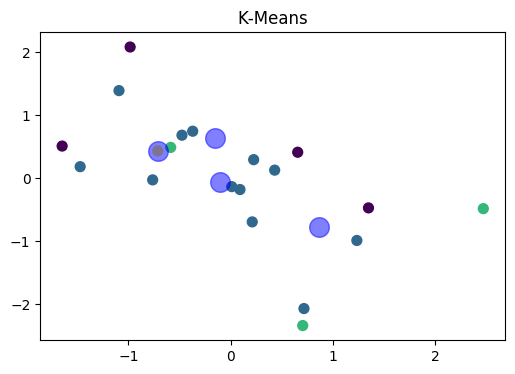

K-Means
[1 1 1 1 1 0 1 1 1 3 2 0 2 2 0 1 0 1 1 1]


<Figure size 640x480 with 0 Axes>

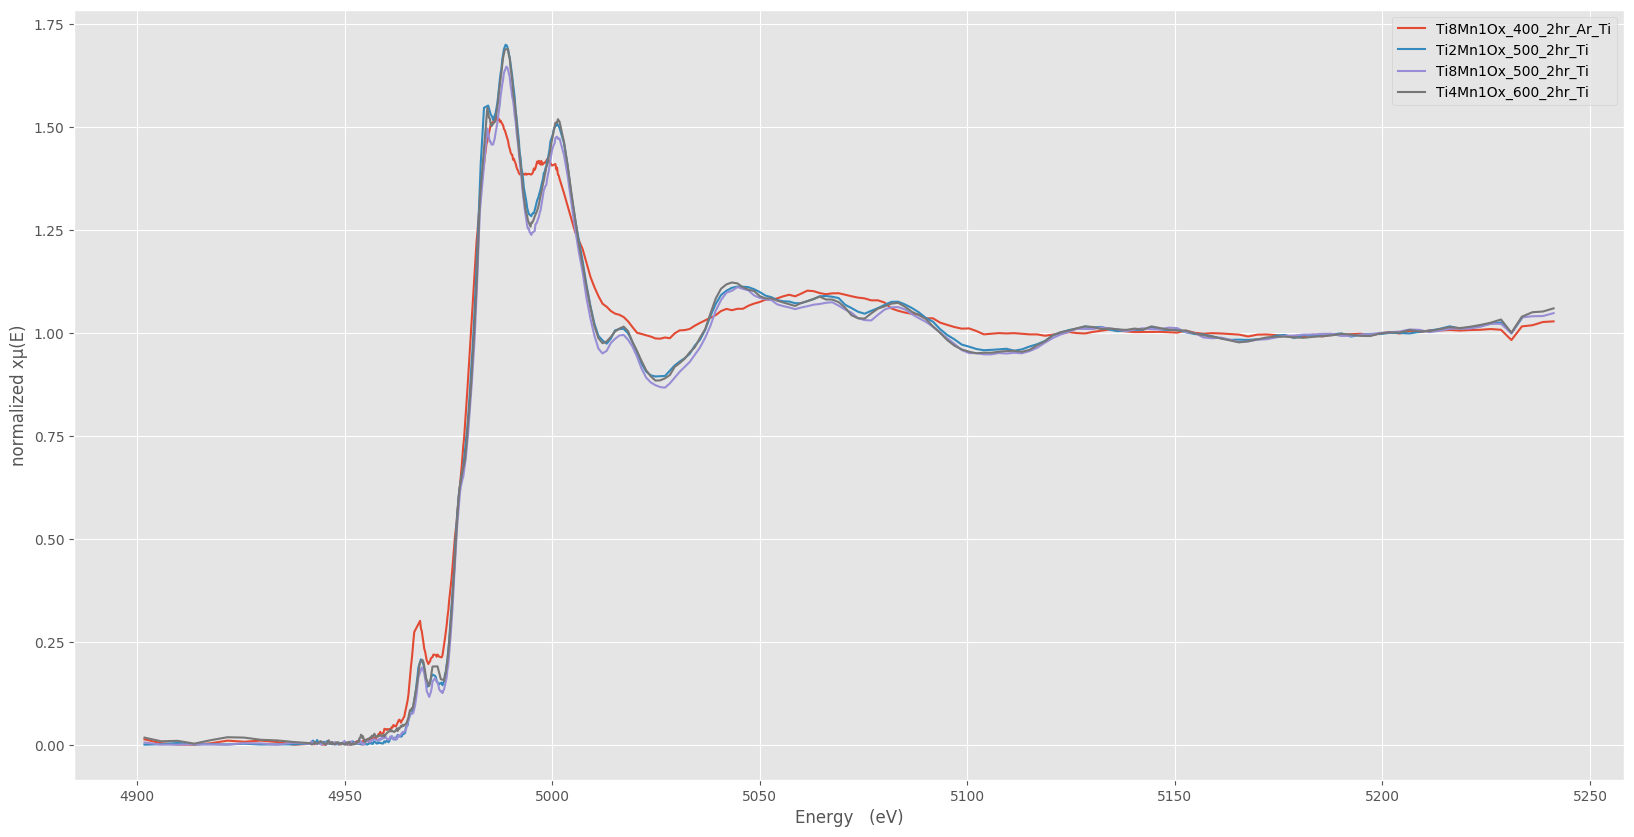

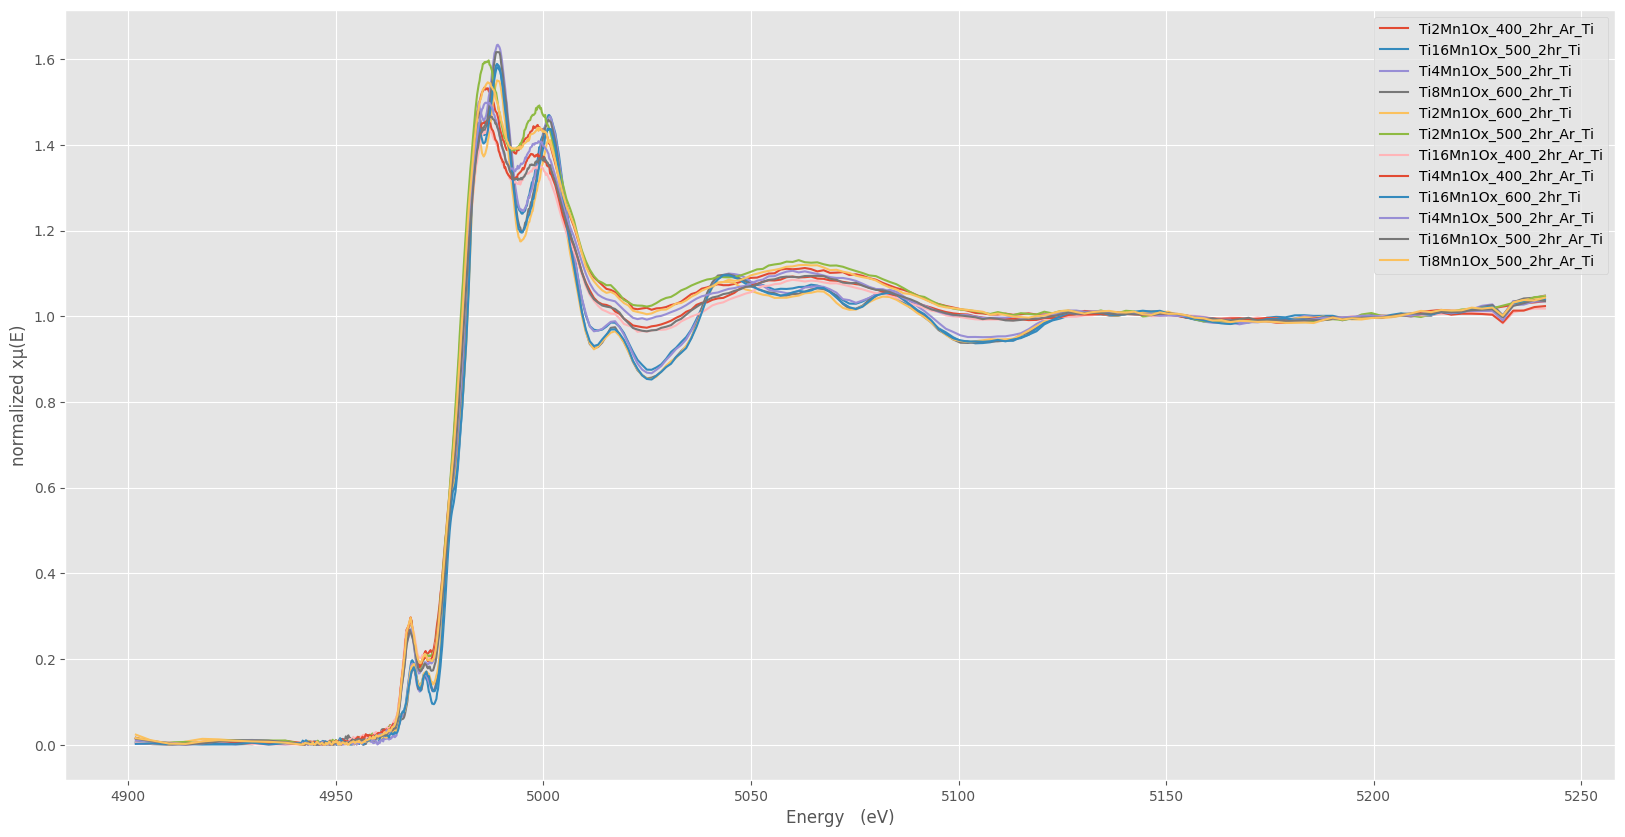

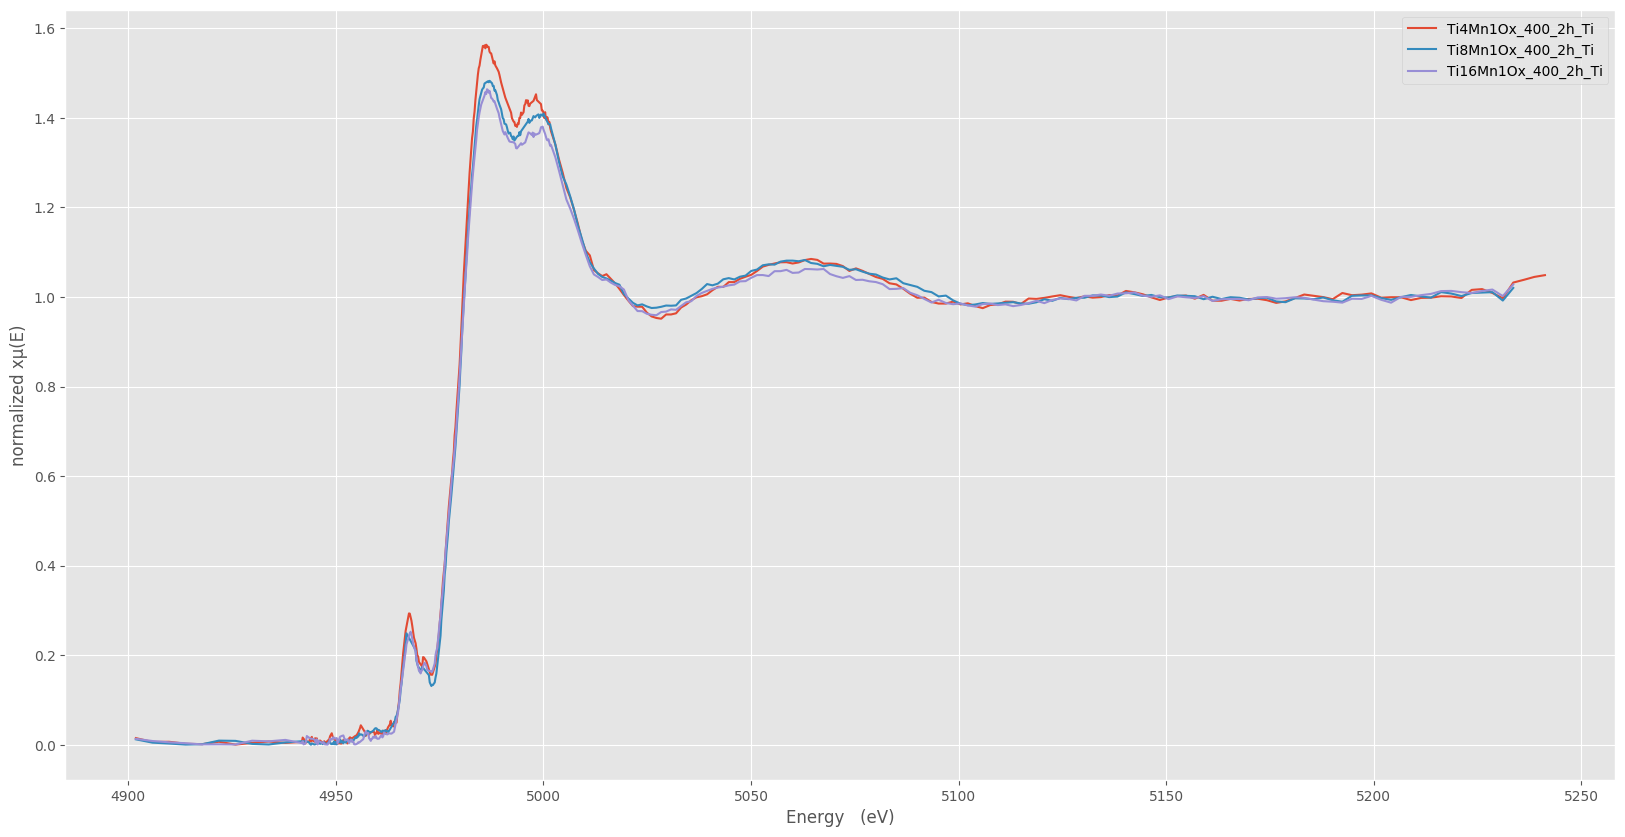

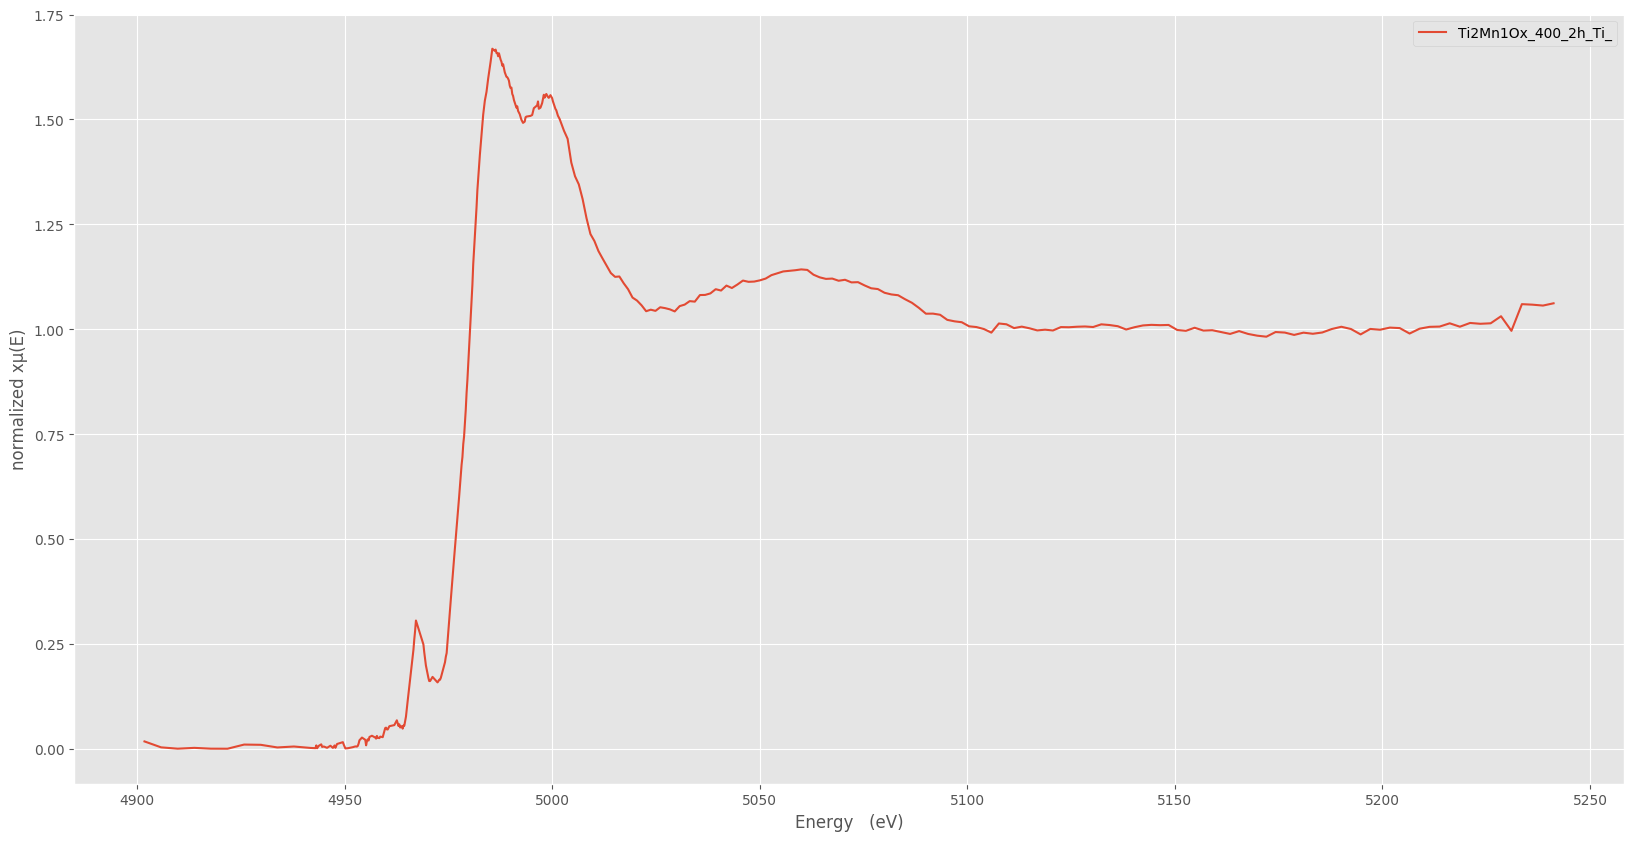

In [68]:
#Run k_means
k_means_arr = c.k_means_cluster()
c.graph(k_means_arr)
print('K-Means')
print(k_means_arr)

In [ ]:
#Run agglom
agglom_arr = c.agglom_cluster()
print('Agglom')
print(agglom_arr)
c.graph(agglom_arr)

In [ ]:
#Run spectral
spectral_arr = c.spectral_cluster()
print('Spectral')
print(spectral_arr)
c.graph(spectral_arr)